In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = "Resources/WT v FREQ - 14.csv"

In [3]:
df = pd.read_csv(file)
df.head()

,EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH,WEIGHT IN POUNDS - RECODE,Total %,Total % SE,Total % CI (lower),Total % CI (upper),Row %,Row % SE,Row % CI (lower),Row % CI (upper),Column %,Column % SE,Column % CI (lower),Column % CI (upper),Weighted Count,Unweighted Count,Count SE
0,1 - Prefer to answer in days per week,100,0.002156,0.000625,0.001204,0.003858,0.425761,0.086426,0.267139,0.601292,0.005711,0.001660,0.003183,0.010225,74809.66784,22,21784.291220
1,1 - Prefer to answer in days per week,101,0.000596,0.000304,0.000214,0.001658,0.676139,0.151807,0.341555,0.893647,0.001579,0.000803,0.000568,0.004378,20683.10166,5,10573.600400
2,1 - Prefer to answer in days per week,102,0.000463,0.000238,0.000165,0.001302,0.878620,0.064374,0.682876,0.960526,0.001227,0.000638,0.000432,0.003483,16075.47790,6,8186.962929
3,1 - Prefer to answer in days per week,103,0.000884,0.000425,0.000336,0.002320,0.579126,0.155710,0.276086,0.832344,0.002341,0.001120,0.000895,0.006112,30665.37021,7,14706.471230
4,1 - Prefer to answer in days per week,104,0.000468,0.000222,0.000181,0.001213,0.696813,0.132762,0.394117,0.890356,0.001240,0.000592,0.000475,0.003234,16244.84889,5,7695.969868


In [4]:
new_df = df[['EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH',
             'WEIGHT IN POUNDS - RECODE',
            'Unweighted Count']]
new_df.reset_index

new_df.head()

,EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH,WEIGHT IN POUNDS - RECODE,Unweighted Count
0,1 - Prefer to answer in days per week,100,22
1,1 - Prefer to answer in days per week,101,5
2,1 - Prefer to answer in days per week,102,6
3,1 - Prefer to answer in days per week,103,7
4,1 - Prefer to answer in days per week,104,5


In [5]:
new_df[['WEIGHT IN POUNDS - RECODE', 'Unweighted Count']] = new_df[['WEIGHT IN POUNDS - RECODE', 'Unweighted Count']].astype(float)
new_df['Total Weight'] = np.multiply(new_df['WEIGHT IN POUNDS - RECODE'], new_df['Unweighted Count'])
new_df.head()

C:\Users\garyf\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\garyf\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH,WEIGHT IN POUNDS - RECODE,Unweighted Count,Total Weight
0,1 - Prefer to answer in days per week,100.0,22.0,2200.0
1,1 - Prefer to answer in days per week,101.0,5.0,505.0
2,1 - Prefer to answer in days per week,102.0,6.0,612.0
3,1 - Prefer to answer in days per week,103.0,7.0,721.0
4,1 - Prefer to answer in days per week,104.0,5.0,520.0


In [6]:
total_weight = new_df.groupby(['EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH'])['Total Weight'].sum()
total_count = new_df.groupby(['EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH'])['Unweighted Count'].sum()
avg_weight = total_weight/total_count
status = new_df.groupby(['EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH'])
avg_weight

EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH
1 - Prefer to answer in days per week     171.786475
2 - Prefer to answer in days per month    166.952360
3 - Prefer to answer in days per year     169.751101
dtype: float64

In [7]:
final_df = pd.DataFrame({"Average Weight": avg_weight}).round(1)
final_df

,Average Weight
EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH,
1 - Prefer to answer in days per week,171.8
2 - Prefer to answer in days per month,167.0
3 - Prefer to answer in days per year,169.8


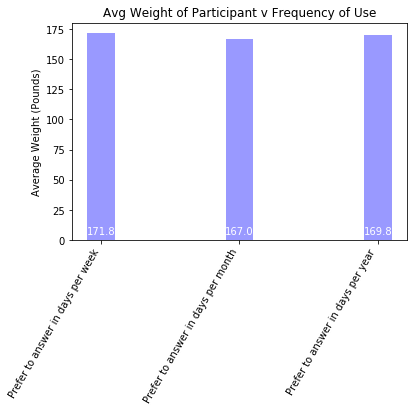

In [10]:
fig, ax = plt.subplots()
index = np.arange(len(avg_weight)) 
bar_width = 0.2
opacity = 0.4
error_config = {'ecolor': '0.3'}



rects1 = ax.bar(index, avg_weight, bar_width,
               alpha=opacity, color='b',
               error_kw=error_config,
               )



ax.set_ylabel("Average Weight (Pounds)")
ax.set_title("Avg Weight of Participant v Frequency of Use")
ax.set_xticks(index)
ax.set_xticklabels(('Prefer to answer in days per week', 'Prefer to answer in days per month','Prefer to answer in days per year'), rotation=60,ha='right')

def autolabelPass(rects1):
    for rect in rects1:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%.1f' % float(height),
                ha='center', va='bottom', color="white")

autolabelPass(rects1)

plt.show()